In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file that was exported from MongoDB
file_name = "new_survey_data.csv"
df = pd.read_csv(file_name)

# Display the first few rows
df.head(10)

,age,gender,income,utilities,entertainment,school_fees,shopping,healthcare
0,46,Male,34500.0,1200.0,450.0,1200.0,350.0,1000.0
1,67,Female,100000.0,3400.0,10000.0,4500.0,12450.0,2500.0
2,67,Male,56700.0,1200.0,450.0,1780.0,3000.0,3000.0
3,29,Female,300000.0,2450.0,12000.0,10000.0,4500.0,3500.0
4,30,Male,450000.0,12000.0,4500.0,12000.0,25000.0,5000.0
5,78,Male,275000.0,10000.0,24500.0,40000.0,12000.0,13400.0
6,57,Female,42000.0,2302.0,5600.0,12000.0,4500.0,2400.0
7,40,Male,87500.0,2300.0,4500.0,1200.0,1300.0,300.0
8,63,Male,3673830.0,1233.0,5000.0,13500.0,2450.0,2330.0
9,90,Female,6543300.0,12778.0,12000.0,56000.0,35000.0,12000.0


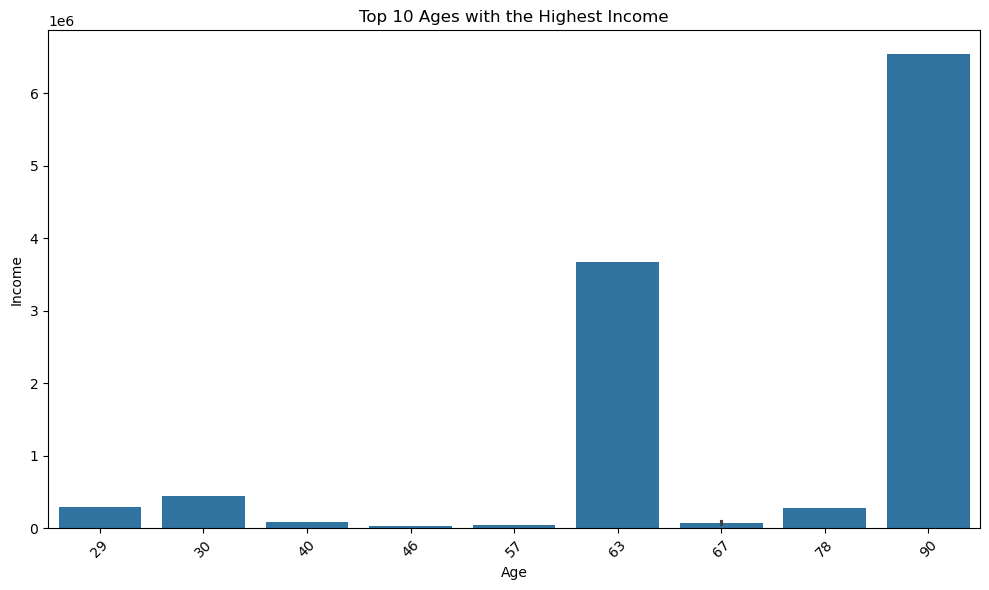

In [3]:
# Sort the data by income in descending order to show the highest income
highest_income_df = df.sort_values(by="income", ascending=False)

# Show the top 10 rows with the highest income
highest_income_df[['age', 'income']].head(10)

# Optionally, plot this data
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='income', data=highest_income_df.head(10))
plt.title("Top 10 Ages with the Highest Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

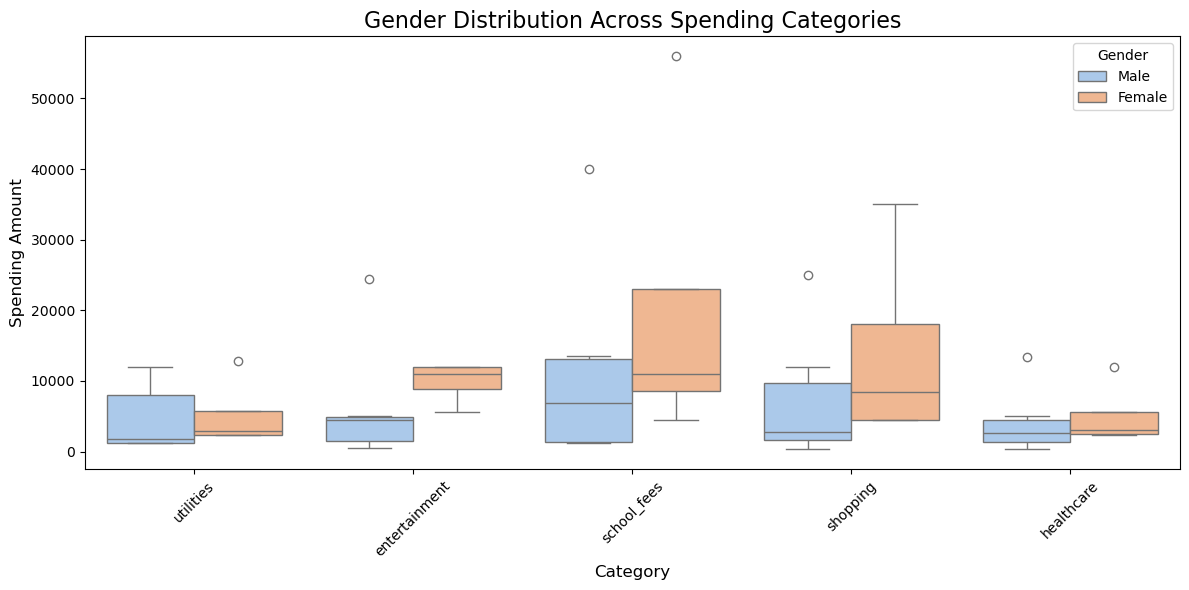

In [4]:
# Prepare the data for spending distribution
categories = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
spending_data = df.melt(id_vars=['gender'], value_vars=categories, var_name='Category', value_name='Spending')

plt.figure(figsize=(12, 6))
sns.boxplot(data=spending_data, x='Category', y='Spending', hue='gender', palette='pastel')
plt.title('Gender Distribution Across Spending Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Spending Amount', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('gender_distribution_spending.png')  # Export chart
plt.show()

        utilities  entertainment  school_fees  shopping  healthcare
gender                                                             
Female    20930.0        39600.0      82500.0   56450.0     20400.0
Male      27933.0        39400.0      69680.0   44100.0     25030.0


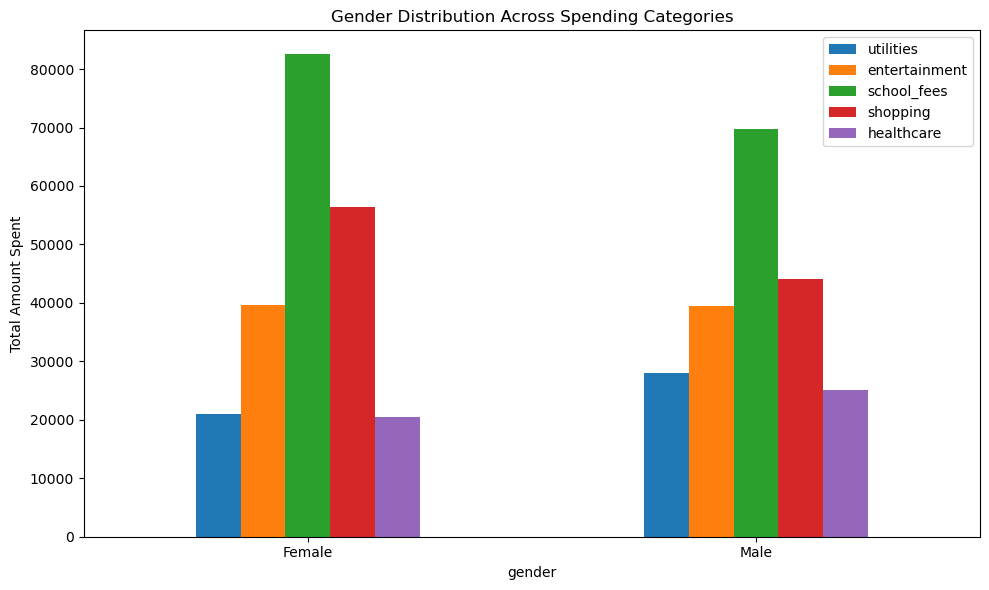

In [5]:
# Create a DataFrame to represent the sum of expenses by gender for each category
gender_expenses = df.groupby("gender")[['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']].sum()

# Display the gender spending distribution
print(gender_expenses)

# Plot the gender distribution across different spending categories
gender_expenses.plot(kind='bar', figsize=(10, 6))
plt.title("Gender Distribution Across Spending Categories")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


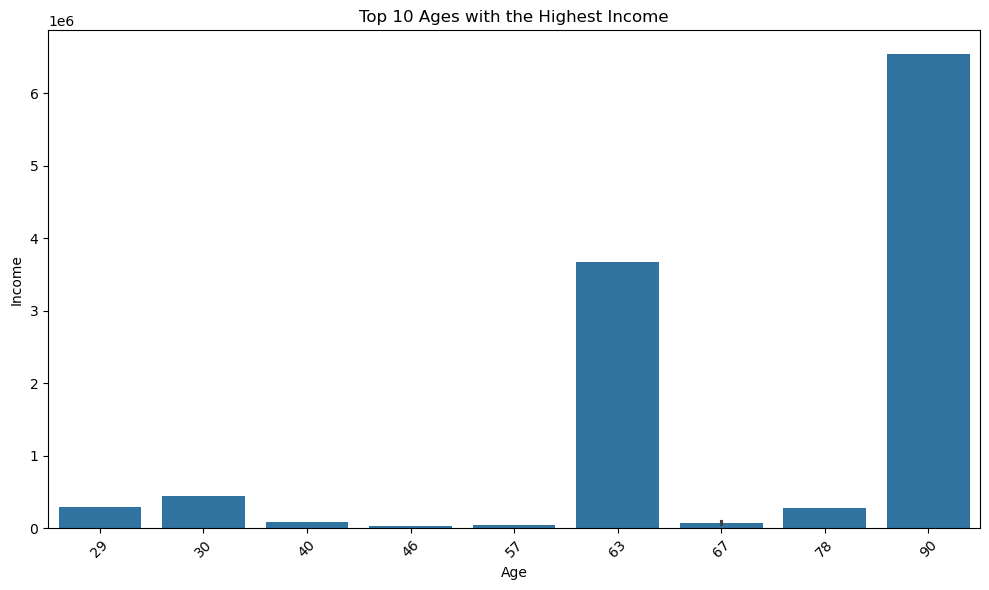

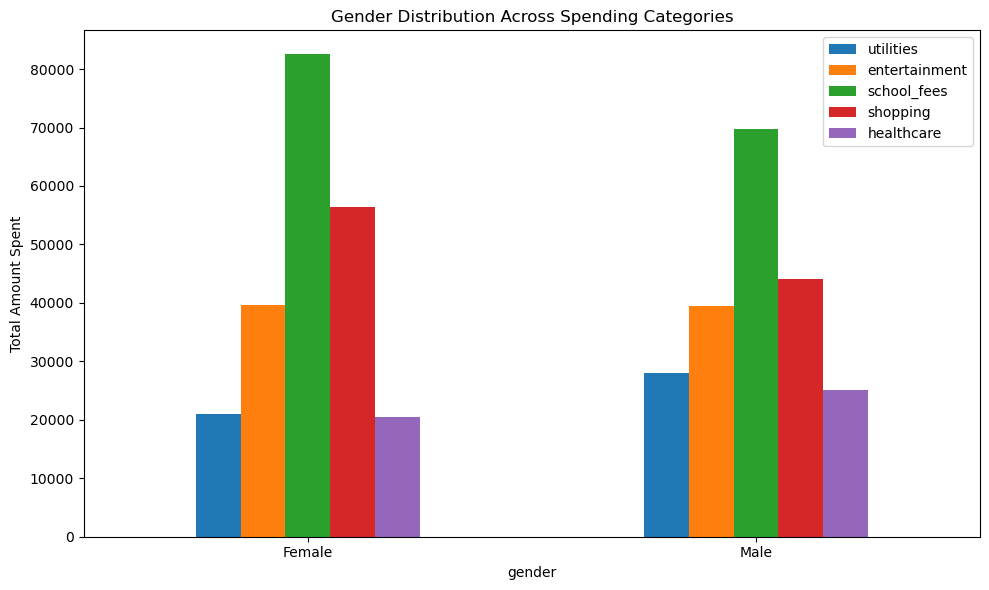

In [6]:
# Save the charts as images (you can later use these images in PowerPoint)
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='income', data=highest_income_df.head(10))
plt.title("Top 10 Ages with the Highest Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("highest_income_chart.png")

# Gender distribution plot
gender_expenses.plot(kind='bar', figsize=(10, 6))
plt.title("Gender Distribution Across Spending Categories")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("gender_distribution_chart.png")